# **Importing Data**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import datetime

In [ ]:
# Importing Customer behaviour data
data=pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

In [ ]:
data.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,49,Female,1
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,49,Female,1
7,13593,2021-03-27 21:23:28,Books,337,2,2937,Cash,49,0.0,James Grant,49,Female,1
8,13593,2020-05-05 20:14:00,Clothing,182,2,3363,PayPal,49,1.0,James Grant,49,Female,1
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,19,Male,0


# **EDA and Data Cleaning**

In [ ]:
# Details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
# Converting Datatype from object to datetime
data['Purchase Date']=pd.to_datetime(data['Purchase Date'],errors='coerce')

In [ ]:
# Details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [ ]:
# Checking for null values
data.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [ ]:
# Filling null values by mean
data=data.fillna('mean')

In [ ]:
data.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [ ]:
# Checking duplicate values
data.duplicated().sum()

np.int64(0)

In [ ]:
# Statistical Summary
data.describe()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Age,Churn
count,250000.00000,250000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,2021-11-06 23:31:24.372304384,254.659512,2.998896,2725.370732,43.940528,43.940528,0.199496
min,1.00000,2020-01-01 00:15:00,10.000000,1.000000,100.000000,18.000000,18.000000,0.000000
25%,12497.75000,2020-12-02 19:33:23.249999872,132.000000,2.000000,1477.000000,31.000000,31.000000,0.000000
50%,25018.00000,2021-11-06 13:10:59,255.000000,3.000000,2724.000000,44.000000,44.000000,0.000000
75%,37506.00000,2022-10-11 03:42:32.750000128,377.000000,4.000000,3974.000000,57.000000,57.000000,0.000000
max,50000.00000,2023-09-15 12:24:08,500.000000,5.000000,5350.000000,70.000000,70.000000,1.000000
std,14428.27959,NaN,141.568577,1.414694,1442.933565,15.350246,15.350246,0.399622


In [ ]:
data.describe(include='O')

,Product Category,Payment Method,Returns,Customer Name,Gender
count,250000,250000,250000.0,250000,250000
unique,4,4,3.0,39920,2
top,Clothing,Credit Card,0.0,Michael Smith,Female
freq,75052,100486,101635.0,107,125560


In [ ]:
data.describe(include='all')

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
count,250000.00000,250000,250000,250000.000000,250000.000000,250000.000000,250000,250000.000000,250000.0,250000,250000.000000,250000,250000.000000
unique,NaN,NaN,4,NaN,NaN,NaN,4,NaN,3.0,39920,NaN,2,NaN
top,NaN,NaN,Clothing,NaN,NaN,NaN,Credit Card,NaN,0.0,Michael Smith,NaN,Female,NaN
freq,NaN,NaN,75052,NaN,NaN,NaN,100486,NaN,101635.0,107,NaN,125560,NaN
mean,25004.03624,2021-11-06 23:31:24.372304384,NaN,254.659512,2.998896,2725.370732,NaN,43.940528,NaN,NaN,43.940528,NaN,0.199496
min,1.00000,2020-01-01 00:15:00,NaN,10.000000,1.000000,100.000000,NaN,18.000000,NaN,NaN,18.000000,NaN,0.000000
25%,12497.75000,2020-12-02 19:33:23.249999872,NaN,132.000000,2.000000,1477.000000,NaN,31.000000,NaN,NaN,31.000000,NaN,0.000000
50%,25018.00000,2021-11-06 13:10:59,NaN,255.000000,3.000000,2724.000000,NaN,44.000000,NaN,NaN,44.000000,NaN,0.000000
75%,37506.00000,2022-10-11 03:42:32.750000128,NaN,377.000000,4.000000,3974.000000,NaN,57.000000,NaN,NaN,57.000000,NaN,0.000000
max,50000.00000,2023-09-15 12:24:08,NaN,500.000000,5.000000,5350.000000,NaN,70.000000,NaN,NaN,70.000000,NaN,1.000000


# **Feature Engineering**

**Creating RFM Table**

R = Recency, F = Frequency, M = Monetary

In [ ]:
# RFM Date features
data['Year']=data['Purchase Date'].dt.year
data['Month']=data['Purchase Date'].dt.month
data['DayOfWeek']=data['Purchase Date'].dt.day_name()

In [ ]:
# Reference date to calculate Recency
snapshot_date=data['Purchase Date'].max()+pd.Timedelta(days=1)

Finds the most recent purchase date in the dataset.

Adds 1 day to it.


Why add 1 day?
=>To avoid Recency = 0 for customers who purchased on the last date.

In [ ]:
# RFM Table creation
rfm=data.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (snapshot_date - x.max()).days,
    'Customer ID': 'count',
    'Total Purchase Amount': 'sum'
})

In [ ]:
# Rename RFM columns
rfm.columns=['Recency','Frequency','Monetary']

Converting raw RFM values(Recency, frequecy, Monetary) into scores

In [ ]:
rfm['R_Score']=pd.qcut(rfm['Recency'],4,labels=False,duplicates='drop')
rfm['F_Score']=pd.qcut(rfm['Frequency'],4,labels=False,duplicates='drop')
rfm['M_Score']=pd.qcut(rfm['Monetary'],4,labels=False,duplicates='drop')

rfm['RFM_Score']=rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

In [ ]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
1,58,1,3491,0,0,0,0
2,299,3,7988,2,0,0,2
3,89,8,22587,1,3,3,7
4,127,4,8715,1,1,0,2
5,171,8,12524,1,3,1,5
...,...,...,...,...,...,...,...
49996,272,4,14044,2,1,2,5
49997,50,8,22431,0,3,3,6
49998,12,4,8610,0,1,0,1


# **Profiling Customer Segments**

1. Creating RFM based segments

In [ ]:
def rfm_segment(row):
    if row['RFM_Score'] >= 8:
        return 'Champions'
    elif row['RFM_Score'] >= 6:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 4:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 2:
        return 'At-Risk'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)


2. Profiling Each Segment

In [ ]:
segment_profile = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean',
    'Segment': 'count'
}).rename(columns={'Segment':'Customer_Count'})

segment_profile


,Recency,Frequency,Monetary,RFM_Score,Customer_Count
Segment,,,,,
At-Risk,325.239625,3.320233,8359.329089,2.663348,15470
Champions,346.493868,7.752617,22520.446306,8.195334,3343
Lost Customers,76.052785,2.785411,6454.304509,0.671618,3770
Loyal Customers,205.449495,7.171796,20462.730271,6.379025,12672
Potential Loyalists,270.897628,4.947774,13393.089471,4.487377,14418


**1. Champions**

Low recency → purchased recently

High frequency → buy often

High monetary value → spend more

Business meaning: Most valuable customers

**2. Loyal Customers**

Purchase frequently but not always recently

Medium–high spending

Stable revenue contributors

**3. Potential Loyalists**

Recent buyers

Moderate purchase frequency

Medium spending

**4. At-Risk Customers**

Long time since last purchase

Previously good spenders

Declining engagement

**5. Lost Customers**

Very high recency (inactive)

Low frequency

Low spending

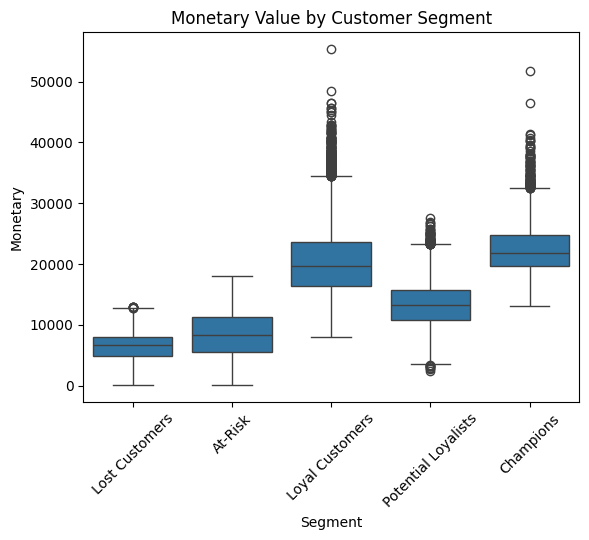

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Segment', y='Monetary', data=rfm)
plt.xticks(rotation=45)
plt.title("Monetary Value by Customer Segment")
plt.show()


# **Visualizations**

**A. Purchase Patterns**

<Axes: xlabel='Month', ylabel='Total Purchase Amount'>

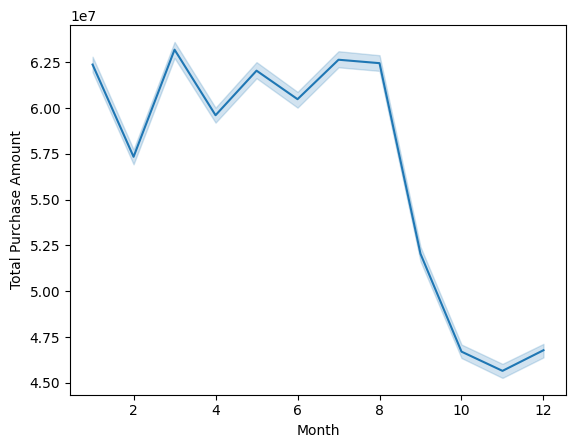

In [ ]:
# Line Plot
import seaborn as sns
sns.lineplot(data=data, x='Month', y='Total Purchase Amount', estimator='sum')

**B. Category Preferences**

<Axes: ylabel='Product Category'>

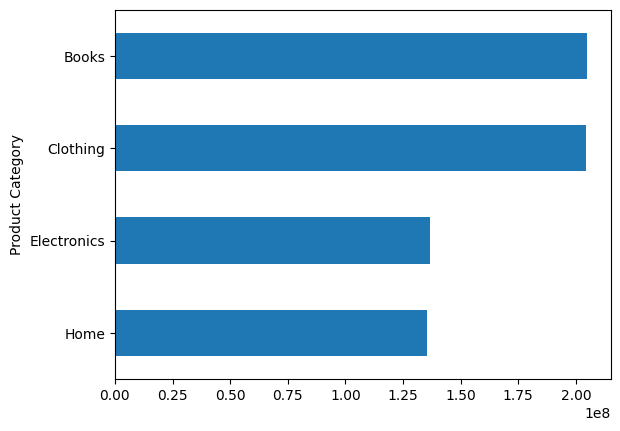

In [ ]:
# Bar Plot
data.groupby('Product Category')['Total Purchase Amount'].sum().sort_values().plot(kind='barh')


**C. Month-over-Month Repeat Buyers (Retention Trend)**

In [ ]:
# Creating Year-Month column
data['YearMonth'] = data['Purchase Date'].dt.to_period('M')

# Count unique customers per month
monthly_customers = (
    data.groupby('YearMonth')['Customer ID']
    .nunique()
    .reset_index()
)

monthly_customers['YearMonth'] = monthly_customers['YearMonth'].astype(str)


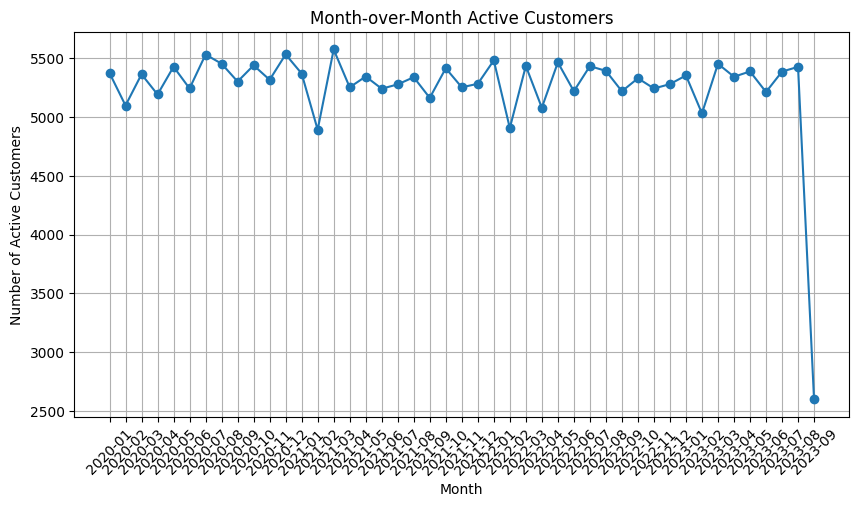

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_customers['YearMonth'], monthly_customers['Customer ID'], marker='o')
plt.xticks(rotation=45)
plt.title('Month-over-Month Active Customers')
plt.xlabel('Month')
plt.ylabel('Number of Active Customers')
plt.grid(True)
plt.show()

**D. Churn Flag – No Purchase in Last X Months**

In [ ]:
snapshot_date = data['Purchase Date'].max()
churn_months = 3

# Last Purchase per customer
last_purchase = data.groupby('Customer ID')['Purchase Date'].max().reset_index()

# Create churn flag
last_purchase['Months_Since_Last_Purchase'] = (
    (snapshot_date - last_purchase['Purchase Date']) / pd.Timedelta(days=30)
)

last_purchase['Churn_Flag'] = last_purchase['Months_Since_Last_Purchase'] > churn_months

# Count churned vs active customers
churn_counts = last_purchase['Churn_Flag'].value_counts().reset_index()
churn_counts.columns = ['Churn_Flag', 'Customer_Count']


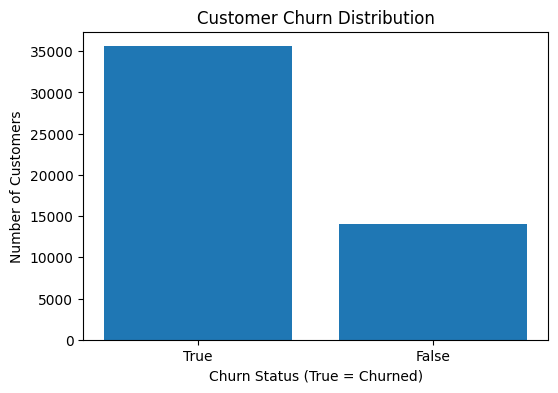

In [ ]:
# Plot churn distribution
plt.figure(figsize=(6,4))
plt.bar(churn_counts['Churn_Flag'].astype(str), churn_counts['Customer_Count'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status (True = Churned)')
plt.ylabel('Number of Customers')
plt.show()

# **Retention & Loyalty Analysis**

In [ ]:
last_purchase = data.groupby("Customer ID")['Purchase Date'].max().reset_index()
last_purchase['Churn'] = last_purchase['Purchase Date'] < pd.to_datetime("2025-01-01")

np.True_